In [1]:
import numpy as np
import scipy
import random
import urllib
import matplotlib.pyplot as plt
import json

In [2]:
random.seed(0) #set an initial seed so that we can reproduce consistently

In [3]:
def readJSONfromFile(fname):
    yelp_data = []
    with open(fname) as f:
        for line in f:
            yelp_data.append(json.loads(line))
    return yelp_data

In [4]:
Iu = readJSONfromFile('data/yelp_Iu.json')

In [5]:
Iu = Iu[0]

In [6]:
len(Iu.keys())

721779

In [7]:
Ui = readJSONfromFile('data/yelp_Ui.json')

In [8]:
Ui = Ui[0]

In [9]:
I = readJSONfromFile('data/yelp_restaurant_data.json')

In [10]:
I = I[0]

In [12]:
VegasRest = []
for i in I:
    if i['city'] == 'Las Vegas':
        VegasRest.append(i['business_id'])

In [13]:
len(VegasRest)

5431

In [14]:
AllUser = Iu.keys()

In [15]:
len(AllUser)

721779

In [16]:
IuVegas = {}
count = 0
with open("data/yelp_academic_dataset_review.json", "U") as f:
    for line in f:
        count += 1
        if count > 10:
            break
        review = json.loads(line)
        rest = review["business_id"]
        print rest
#         print I[rest]['city']
        if rest in VegasRest:
            user = review["user_id"]
            print rest, user
            if IuVegas.has_key(user):
                IuVegas[user].append(rest)
            else:
                IuVegas[user] = [rest]

2aFiy99vNLklCx3T_tGS9A
2aFiy99vNLklCx3T_tGS9A
2aFiy99vNLklCx3T_tGS9A
2LfIuF3_sX6uwe-IR-P0jQ
2LfIuF3_sX6uwe-IR-P0jQ
2LfIuF3_sX6uwe-IR-P0jQ
2LfIuF3_sX6uwe-IR-P0jQ
2LfIuF3_sX6uwe-IR-P0jQ
2LfIuF3_sX6uwe-IR-P0jQ
2LfIuF3_sX6uwe-IR-P0jQ


In [17]:
len(IuVegas.keys())

0

In [18]:
IuVegas = {}
count = 0
for user in AllUser:
    if count%1000 == 0:
        print count/1000
    count += 1
    for rest in Iu[user]:
        if rest in VegasRest:
            if IuVegas.has_key(user):
                IuVegas[user].append(rest)
            else:
                IuVegas[user] = [rest]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [19]:
len(IuVegas.keys())

275012

In [20]:
with open("data/yelp_user_IuVegas.json","w") as outfile:
    json.dump(IuVegas,outfile)

print("File written")
outfile.close()

File written


In [21]:
UiVegas = {}
for rest in VegasRest:
    UiVegas[rest] = Ui[rest]

In [22]:
with open("data/yelp_user_UiVegas.json","w") as outfile:
    json.dump(UiVegas,outfile)

print("File written")
outfile.close()

File written


In [99]:
VegasUser = []
for user in IuVegas.keys():
    if len(IuVegas[user]) >= 10:
        VegasUser.append(user)

In [101]:
len(VegasUser)

11264

In [100]:
len_u = []
len_i = []
for k in IuVegas.keys():
    len_i.append(len(IuVegas[k]))
for k in UiVegas.keys():
    len_u.append(len(UiVegas[k]))

In [47]:
len_u.sort()
len_u = len_u[:int(len(len_u)*0.999)]

In [59]:
len_i.sort()
len_i = len_i[:int(len(len_i)*0.999)]

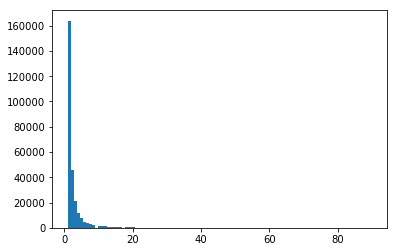

In [60]:
import matplotlib.pyplot as plt

plt.hist(len_i,bins=100)
plt.show()

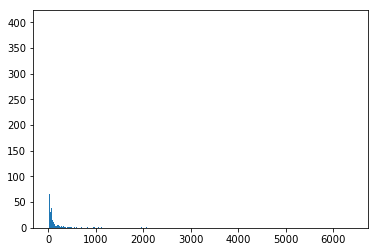

In [62]:
import matplotlib.pyplot as plt

plt.hist(len_u,bins=6000)
plt.show()

In [137]:
Lambda = 0
Alpha = 10**-4
K = 1

In [127]:
Gamma_u = {}
Gamma_r = {}

In [128]:
for user in VegasUser:
    Gamma_u[user] = np.random.rand(K)
for rest in VegasRest:
    Gamma_r[rest] = np.random.rand(K)

In [129]:
def logit(t):
    return np.exp(-t)/(1+np.exp(-t))

In [106]:
def sigmoid(t):
    return 1-logit(t)

In [107]:
import math
def vlen(t):
    su = 0
    for i in t:
        su += i*i
    return su

In [138]:
CUser = []
Cirest = []
Cjrest = []
iterations = 10000
l=[]

In [117]:
def generate_validation_set(VegasUser, VegasRest):
    #to be used every 10k iterations
    triple_arr = []
    for i in range(1000):
        user = np.random.choice(VegasUser)  #pick user
        irest = np.random.choice(IuVegas[user])  #pick item i
        jrest = np.random.choice(list(set(VegasRest) - set(IuVegas[user])))  #pick item j
        triple_arr.append([user,irest,jrest])
    return triple_arr

In [118]:
val_array = generate_validation_set(VegasUser,VegasRest)

In [119]:
len(val_array)

1000

In [120]:
def val_loss():
    su = 0
    for i in range(len(val_array)):
        user = val_array[i][0]
        irest = val_array[i][1]
        jrest = val_array[i][2]
        xuij = np.dot(Gamma_u[user],Gamma_r[irest]-Gamma_r[jrest])
        su += np.log(sigmoid(xuij))
    return su

In [121]:
def loss(CUser,Cirest,Cjrest):
    su = 0
    for i in range(len(CUser)):
        user = CUser[i]
        irest = Cirest[i]
        jrest = Cjrest[i]
        xuij = np.dot(Gamma_u[user],Gamma_r[irest]-Gamma_r[jrest])
        su += np.log(sigmoid(xuij))
    for user in VegasUser:
        su -= Lambda* vlen(Gamma_u[user]) * vlen(Gamma_u[user])
    for rest in VegasRest:
        su -= Lambda* vlen(Gamma_r[rest]) * vlen(Gamma_r[rest])
    return su*1.0/len(CUser)

In [122]:
# for i in range(iterations):
#     user = random.choice(Iu.keys())
#     CUser.append(user)
#     irest = random.choice(Iu[user])
#     Cirest.append(irest)
#     jrest = random.choice(list(AllRestSet - set(Iu[user])))
#     Cjrest.append(jrest)
# for i in range(iterations):
#     user = CUser[i]
#     irest = Cirest[i]
#     jrest = Cjrest[i]
#     xuij = np.dot(Gamma_u[user],Gamma_r[irest]-Gamma_r[jrest])
#     Gamma_u[user] += Alpha*(logit(xuij)*(Gamma_r[irest]-Gamma_r[jrest]) + Lambda*Gamma_u[user])
#     Gamma_r[irest]+= Alpha*(logit(xuij)*(Gamma_u[user]) + Lambda*Gamma_r[irest])
#     Gamma_r[jrest]+= Alpha*(logit(xuij)*(-Gamma_u[user]) + Lambda*Gamma_r[jrest])
#     l.append(loss(CUser,Cirest,Cjrest))

In [123]:
# plt.plot(range(iterations),l)
# plt.show()

In [139]:
train_l = []
val_l = []

In [140]:
for i in range(iterations):
    user = random.choice(VegasUser)
    CUser.append(user)
    irest = random.choice(IuVegas[user])
    Cirest.append(irest)
    jrest = random.choice(list(set(VegasRest) - set(IuVegas[user])))
    Cjrest.append(jrest)
for i in range(iterations):
    user = CUser[i]
    irest = Cirest[i]
    jrest = Cjrest[i]
    xuij = np.dot(Gamma_u[user],Gamma_r[irest]-Gamma_r[jrest])
    x= Alpha*(logit(xuij)*(Gamma_r[irest]-Gamma_r[jrest]))
    y = Alpha*(logit(xuij)*(Gamma_u[user]))
    z = Alpha*(logit(xuij)*(-Gamma_u[user]))
    for user in VegasUser:
        Gamma_u[user] += Alpha*Lambda*Gamma_u[user]
    for rest in VegasRest:
        Gamma_r[rest] += Alpha*Lambda*Gamma_r[rest]
    Gamma_u[user] += x
    Gamma_r[irest] += y
    Gamma_r[jrest] += z
    if i%100== 0:
        train_l.append(loss(CUser,Cirest,Cjrest))
        val_l.append(val_loss())
        print(i/100,val_l[-1],train_l[-1])

(0, -751.40080124273936, -0.73844258795438322)
(1, -751.40062116932927, -0.73844253457227738)
(2, -751.40055118281543, -0.73844230849952119)
(3, -751.40041678412911, -0.73844207376871462)
(4, -751.40021741599901, -0.73844165110091886)
(5, -751.39988085435016, -0.73844150300570532)
(6, -751.39960631996792, -0.73844134127425098)
(7, -751.3993310036434, -0.73844101879395208)
(8, -751.39910035768276, -0.73844088183936518)
(9, -751.39876408372686, -0.73844052112951653)
(10, -751.39825069137521, -0.73843995578375032)
(11, -751.39805119982123, -0.73843982363464811)
(12, -751.39794460248106, -0.73843973033191224)
(13, -751.39747434774358, -0.73843944055604593)
(14, -751.39750553430554, -0.73843904761702428)
(15, -751.39752781518769, -0.73843887796740781)
(16, -751.39746816258378, -0.73843877940252478)
(17, -751.39730948591864, -0.73843843850932744)
(18, -751.39722005544468, -0.73843829153619045)
(19, -751.39700931036862, -0.7384381512112892)
(20, -751.39687032248446, -0.73843782651583856)
(21,

KeyboardInterrupt: 

In [93]:
i

99

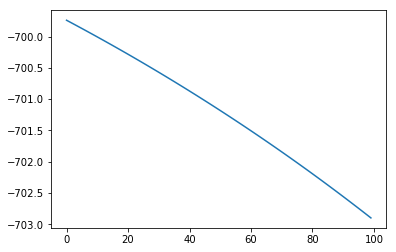

In [94]:
plt.plot(range(100),val_l)
plt.show()

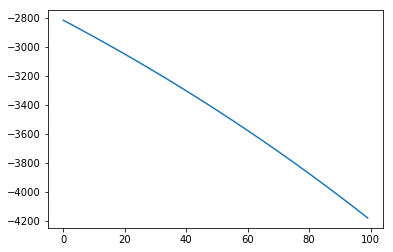

In [95]:
plt.plot(range(100),train_l)
plt.show()